<a href="https://colab.research.google.com/github/sebasatarama/K-Means-Clustering-Costumer-Segmentation/blob/main/K_Means_on_H2O.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configuración de H2O y carga de datos

In [2]:
!apt-get install openjdk-8-jdk

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java libatk-wrapper-java-jni libfontenc1
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libice-dev librsvg2-common
  libsm-dev libxkbfile1 libxt-dev libxtst6 libxxf86dga1 openjdk-8-jdk-headless openjdk-8-jre
  openjdk-8-jre-headless x11-utils
Suggested packages:
  gvfs libice-doc libsm-doc libxt-doc openjdk-8-demo openjdk-8-source visualvm libnss-mdns
  fonts-nanum fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei fonts-wqy-zenhei
  fonts-indic mesa-utils
The following NEW packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java libatk-wrapper-java-jni libfontenc1
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libice-dev librsvg2-common
  libsm-dev libxkbfile1 libxt-dev libxtst6 libxxf86dga1 openjdk-

In [3]:
!pip install H2O

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 3.1 MB/s eta 0:00:00


In [5]:
import h2o
from h2o.estimators import H2OKMeansEstimator

In [7]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpy1ai8j5a
  JVM stdout: /tmp/tmpy1ai8j5a/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpy1ai8j5a/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,1 month and 19 days
H2O_cluster_name:,H2O_from_python_unknownUser_3tmfv1
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [11]:
url_test = 'https://raw.githubusercontent.com/sebasatarama/K-Means-Clustering-Costumer-Segmentation/main/Data/Test.csv'
url_train = 'https://raw.githubusercontent.com/sebasatarama/K-Means-Clustering-Costumer-Segmentation/main/Data/Train.csv'

train_data = h2o.import_file(url_train)
test_data = h2o.import_file(url_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [12]:
train_data.head()

ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
462809,Male,No,22,No,Healthcare,1,Low,4,Cat_4,D
462643,Female,Yes,38,Yes,Engineer,nan,Average,3,Cat_4,A
466315,Female,Yes,67,Yes,Engineer,1,Low,1,Cat_6,B
461735,Male,Yes,67,Yes,Lawyer,0,High,2,Cat_6,B
462669,Female,Yes,40,Yes,Entertainment,nan,High,6,Cat_6,A
461319,Male,Yes,56,No,Artist,0,Average,2,Cat_6,C
460156,Male,No,32,Yes,Healthcare,1,Low,3,Cat_6,C
464347,Female,No,33,Yes,Healthcare,1,Low,3,Cat_6,D
465015,Female,Yes,61,Yes,Engineer,0,Low,3,Cat_7,D
465176,Female,Yes,55,Yes,Artist,1,Average,4,Cat_6,C


In [13]:
test_data.head()

ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
458989,Female,Yes,36,Yes,Engineer,0,Low,1,Cat_6
458994,Male,Yes,37,Yes,Healthcare,8,Average,4,Cat_6
458996,Female,Yes,69,No,,0,Low,1,Cat_6
459000,Male,Yes,59,No,Executive,11,High,2,Cat_6
459001,Female,No,19,No,Marketing,nan,Low,4,Cat_6
459003,Male,Yes,47,Yes,Doctor,0,High,5,Cat_4
459005,Male,Yes,61,Yes,Doctor,5,Low,3,Cat_6
459008,Female,Yes,47,Yes,Artist,1,Average,3,Cat_6
459013,Male,Yes,50,Yes,Artist,2,Average,4,Cat_6
459014,Male,No,19,No,Healthcare,0,Low,4,Cat_6


# Visualización de datos

## Datos elegido para el clustering: Age, Work Experience y Family_size

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


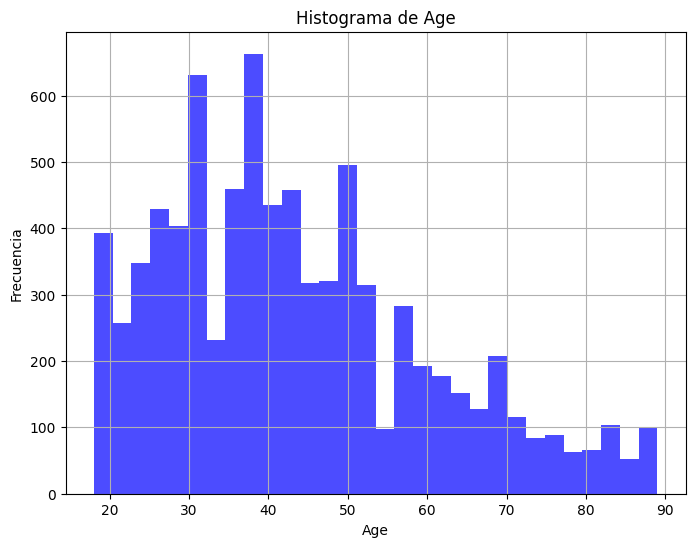

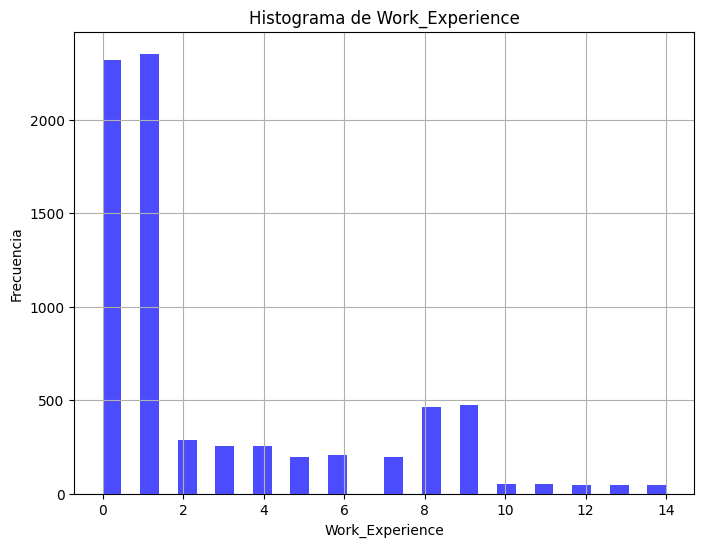

In [22]:
import matplotlib.pyplot as plt

features = ["Age", "Work_Experience"]

train_data_df = train_data.as_data_frame()

# histogramas para cada característica numérica
for feature in features:
    plt.figure(figsize=(8, 6))
    plt.hist(train_data_df[feature], bins=30, color='blue', alpha=0.7)
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')
    plt.title(f'Histograma de {feature}')
    plt.grid(True)
    plt.show()

# Aplicación de K_Means

kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


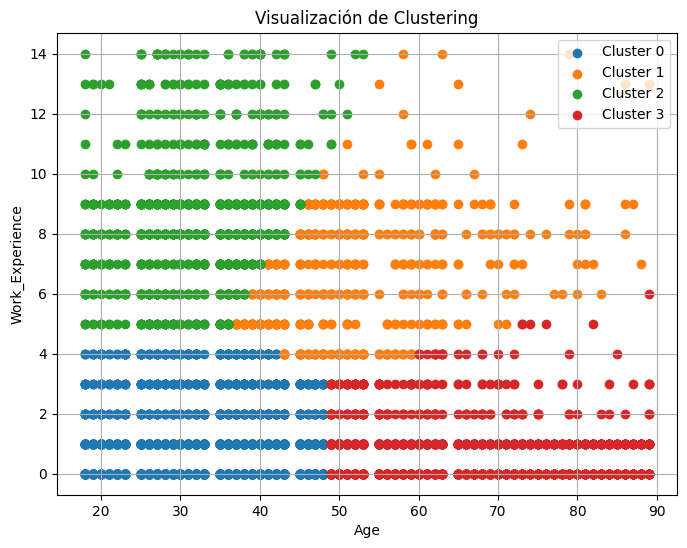

In [23]:
# Crear y entrenar un modelo de K-means con un número específico de clusters
kmeans_model = H2OKMeansEstimator(k=4, seed=123)  # Se elige 4 porque hay 4 segmentos en los datos existentes
kmeans_model.train(training_frame=train_data, x=features)

# Obtener las predicciones de cluster para los datos de entrenamiento
train_cluster_assignment = kmeans_model.predict(train_data)

# Unir las etiquetas de cluster al conjunto de datos de entrenamiento
train_data_with_clusters = train_data.cbind(train_cluster_assignment)

# Convertir el conjunto de datos con etiquetas de cluster a un DataFrame de pandas
train_data_with_clusters_df = train_data_with_clusters.as_data_frame()

# Visualización de los resultados del clustering
plt.figure(figsize=(8, 6))
for cluster_id in range(4):
    cluster_data = train_data_with_clusters_df[train_data_with_clusters_df['predict'] == cluster_id]
    plt.scatter(cluster_data['Age'], cluster_data['Work_Experience'], label=f'Cluster {cluster_id}')
plt.xlabel('Age')
plt.ylabel('Work_Experience')
plt.title('Visualización de Clustering')
plt.legend()
plt.grid(True)
plt.show()